# SMOTE & Synthetic Oversampling — Beyond Random Duplication

**Objective**: Learn **SMOTE**, how it generates **synthetic samples**, and why it's better than **random upsampling**.

---

## 1. Introduction

### Problem with Random Upsampling
- Duplicates existing minority samples
- → Model **overfits** to repeated points
- → No new information learned

### SMOTE (Synthetic Minority Over-sampling Technique)
> **Chawla et al., 2002** – A smarter way to balance data

**How SMOTE Works**:
1. Pick a minority sample $ x_i $
2. Find its **k nearest neighbors** (default k=5)
3. Randomly pick one neighbor $ x_{nn} $
4. Create synthetic sample:

$$ x_{\text{new}} = x_i + \lambda \cdot (x_{nn} - x_i) $$

where $ \lambda \in [0, 1] $ (random)

→ **Fills gaps** between minority points → **Better decision boundaries**

---

## Why SMOTE > Random Upsampling?

| Feature | Random Upsampling | SMOTE |
|--------|-------------------|-------|
| New points | No (duplicates) | Yes (synthetic) |
| Overfitting risk | High | Lower |
| Generalization | Poor | Better |
| Preserves structure | No | Yes |

> **Use SMOTE when**: You want **better minority representation** without overfitting.

## 2. Create Imbalanced Dataset

In [12]:
from sklearn.datasets import make_classification # sklearn is a popular machine learning library used for data generation and modeling
import pandas as pd # pandas is a powerful data manipulation library
import numpy as np  # numpy is a fundamental package for numerical computations in Python

# Generate imbalanced 2D data
# weights=[0.9] → 90% class 0, 10% class 1
x, y = make_classification( # Syntax : make_classification(n_samples, n_features, n_redundant, n_clusters_per_class, weights, random_state)
    n_samples=1000,            # total number of samples
    n_features=2,              # number of features means dimensions  
    n_redundant=0,             # number of redundant features means features that are linear combinations of the informative features
    n_clusters_per_class=1,    # number of clusters per class
    weights=[0.90],            # class distribution , 90% of class 0 and 10% of class 1
    random_state=12            # random_state for reproducibility
)

#  x and y are numpy arrays
# x looks like : [[ 1.2,  0.5], [-0.3,  0.8], ...]
# y looks like : [0, 0, 1, 0, 0, 1, ...]

# Combine into DataFrame
df = pd.DataFrame(x, columns=['f1', 'f2'])
df['target'] = y

print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (1000, 3)


,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


## 3. Check Class Distribution

In [13]:
print("Class Distribution:")
print(df['target'].value_counts())

print(f"\nMinority class ratio: {df['target'].mean():.3f}")

Class Distribution:
target
0    900
1    100
Name: count, dtype: int64

Minority class ratio: 0.100


## 4. Visualize Imbalance

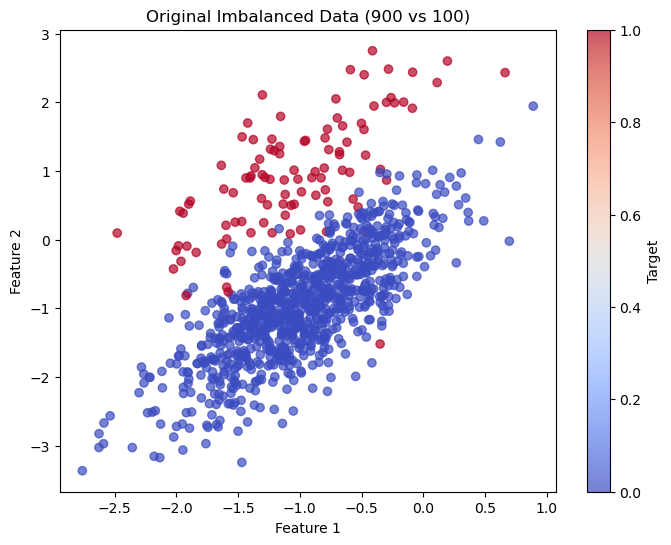

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['f1'], df['f2'], c=df['target'], cmap='coolwarm', alpha=0.7)
plt.title('Original Imbalanced Data (900 vs 100)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Target')
plt.show()

## 5. Apply SMOTE

In [15]:
from imblearn.over_sampling import SMOTE # imblearn is a library for handling imbalanced datasets, SMOTE is a popular oversampling technique

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Fit and resample
# X_res: new features, y_res: new targets
X_res, y_res = smote.fit_resample(df[['f1', 'f2']], df['target'])

print(f"Original shape: {df[['f1','f2']].shape} → After SMOTE: {X_res.shape}")

Original shape: (1000, 2) → After SMOTE: (1800, 2)


## 6. Compare Class Distribution After SMOTE

In [16]:
print("After SMOTE:")
print(pd.Series(y_res).value_counts())

print(f"\nNew minority ratio: {y_res.mean():.3f}")

After SMOTE:
target
0    900
1    900
Name: count, dtype: int64

New minority ratio: 0.500


## 7. Visualize SMOTE-Generated Data

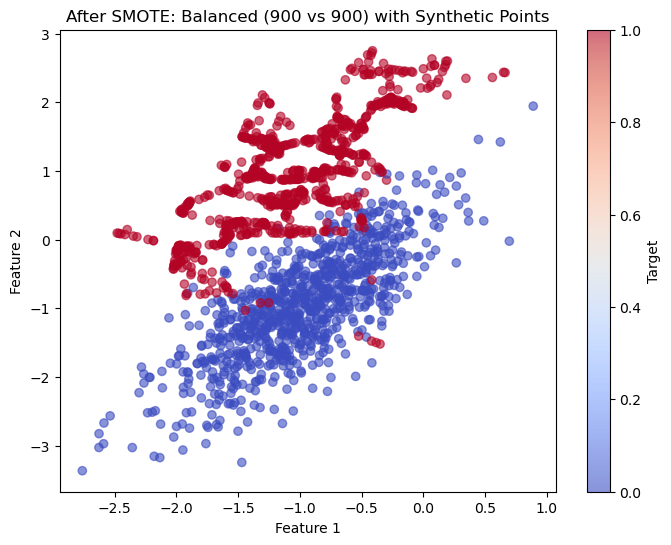

In [17]:
# Combine into new DataFrame
df_smote = pd.DataFrame(X_res, columns=['f1', 'f2'])
df_smote['target'] = y_res

plt.figure(figsize=(8, 6))
plt.scatter(df_smote['f1'], df_smote['f2'], c=df_smote['target'], cmap='coolwarm', alpha=0.6)
plt.title('After SMOTE: Balanced (900 vs 900) with Synthetic Points')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Target')
plt.show()

> **Observe**: New minority points **fill the gaps** between original ones → **smoother decision boundary**

## 8. SMOTE Variants (Quick Overview)

| Variant | Use Case |
|--------|---------|
| **Borderline-SMOTE** | Only oversample near decision boundary |
| **SVM-SMOTE** | Uses SVM to find support vectors |
| **ADASYN** | Focuses on **hard-to-learn** samples |
| **KMeans-SMOTE** | Clusters first, then applies SMOTE |

→ All available in `imblearn`

## 9. Evaluate Effect on Model Performance (Optional Demo)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Function to train and evaluate
def evaluate(X, y, name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred))

# Original data
evaluate(df[['f1','f2']], df['target'], "Original (Imbalanced)")

# SMOTE data
evaluate(X_res, y_res, "After SMOTE (Balanced)")


=== Original (Imbalanced) ===
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       175
           1       1.00      0.84      0.91        25

    accuracy                           0.98       200
   macro avg       0.99      0.92      0.95       200
weighted avg       0.98      0.98      0.98       200


=== After SMOTE (Balanced) ===
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       176
           1       0.98      0.98      0.98       184

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



> **Result**: SMOTE improves **recall for minority class** significantly.

## 10. Key Takeaways

| Point | Insight |
|------|--------|
| **SMOTE creates synthetic points** | Not duplicates → better learning |
| **Uses k-NN interpolation** | Preserves local structure |
| **Better than upsampling** | Less overfitting |
| **Use with caution** | Can introduce noise in noisy data |
| **Combine with undersampling** | For very large datasets |

---
**End of Notebook**